In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Helper functions

In [2]:
def show_img_hsv_mask_result(img, img_hsv, mask, result):
    fontsize = 10
    f, ax = plt.subplots(1, 4, figsize=(20, 20))
    
    ax[0].imshow(img)
    ax[0].set_title(f'RGB', fontsize=fontsize)
    
    ax[1].imshow(img_hsv)
    ax[1].set_title(f'HSV', fontsize=fontsize)
    
    ax[2].imshow(mask, cmap='gray')
    ax[2].set_title(f'Mask', fontsize=fontsize)
    
    ax[3].imshow(result)
    ax[3].set_title(f'Result', fontsize=fontsize)
    

### HSV boundaries

For black color we don't need to worry about hue or saturation, only value.

In [3]:
# lower boundary
lower_black = np.array([0, 0, 0])

# upper boundary
upper_black = np.array([180, 255, 100])

### Color filter

In [4]:
images_path = '../data/from_phone_original/'

In [5]:
#for image in os.listdir(images_path):
#    # load image
#    img = cv2.imread(images_path + image)
#    # blurring
#    blurred = cv2.GaussianBlur(img,(25,25),0)
#    # convert image to HSV format
#    img_hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
#    # find mask based on boundaries value
#    mask = cv2.inRange(img_hsv, lower_black, upper_black)
#    result = cv2.bitwise_and(img_hsv, img_hsv, mask = mask)
#    result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)
#    orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#    # plot results
#    show_img_hsv_mask_result(orig_img, img_hsv, mask, result)

### Blurring

In [6]:
img = cv2.imread(images_path + '0001.jpeg')
# blurring
blurred = cv2.GaussianBlur(img,(25,25),0)
# convert image to HSV format
img_hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
# find mask based on boundaries value
mask = cv2.inRange(img_hsv, lower_black, upper_black)
result = cv2.bitwise_and(img_hsv, img_hsv, mask = mask)
result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)
orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

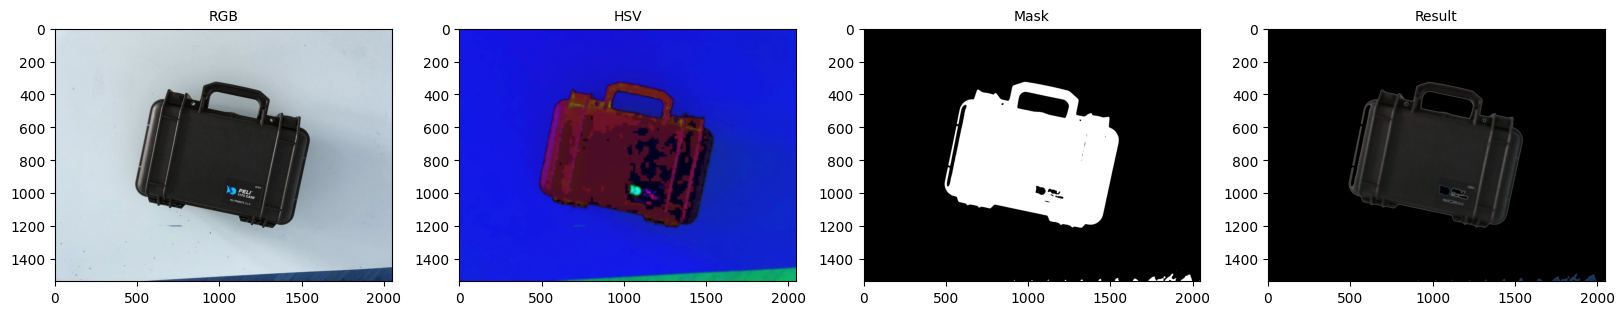

In [7]:
show_img_hsv_mask_result(img, img_hsv, mask, result)

In [8]:
# ima i unutarnje konture
# contours, hierarchy = cv2.findContours(mask_cp, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
result_cp = result.copy()
for i in range(len(contours)):
    cv2.drawContours(result_cp, contours, i, (255, 0, 0), 3)

In [10]:
# find convex hull
hull_list = []
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    hull_list.append(hull)

for i in range(len(contours)):
    cv2.drawContours(result_cp, hull_list, i, (0, 255, 0), 3)

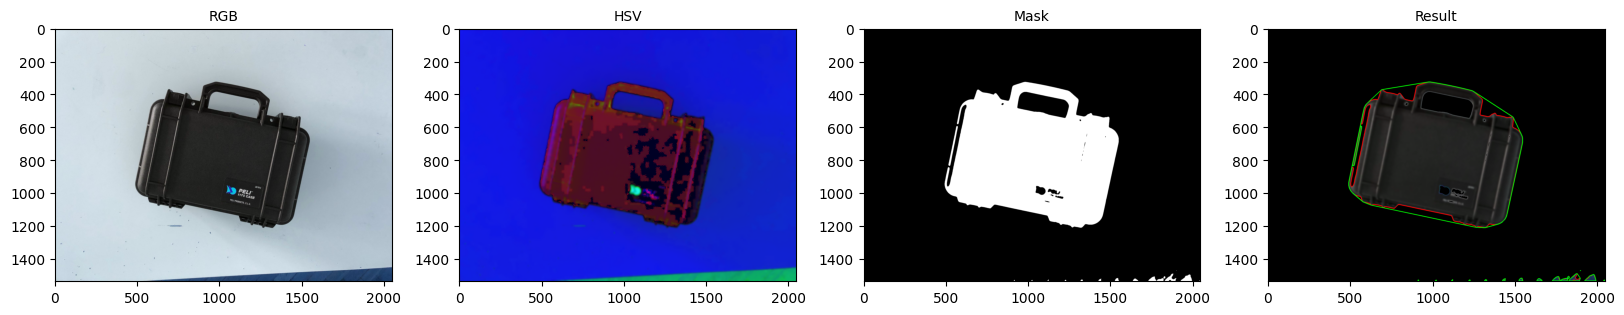

In [11]:
show_img_hsv_mask_result(img, img_hsv, mask, result_cp)

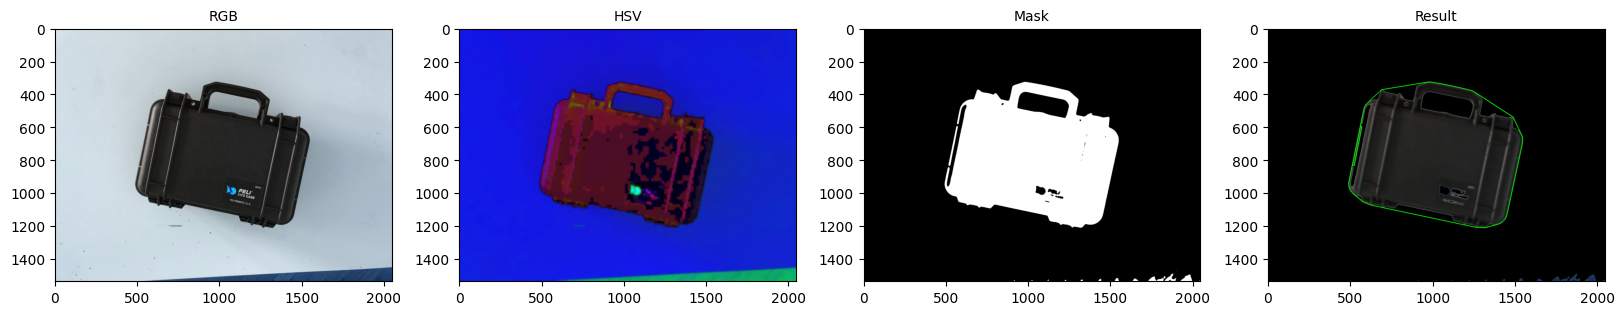

In [12]:
# calculate area
cont_area = []
for i in range(len(contours)):
    area = cv2.contourArea(hull_list[i])
    cont_area.append(area)

cont_area = np.array(cont_area)
two_biggest_conts = np.argsort(cont_area, axis=0)[-2:]

largest_contour_index = np.argmax(cont_area)

result_cp = result.copy()

for i in two_biggest_conts:
    cv2.drawContours(result_cp, hull_list, i, (0, 255, 0), 3)

show_img_hsv_mask_result(img, img_hsv, mask, result_cp)

[15 16]


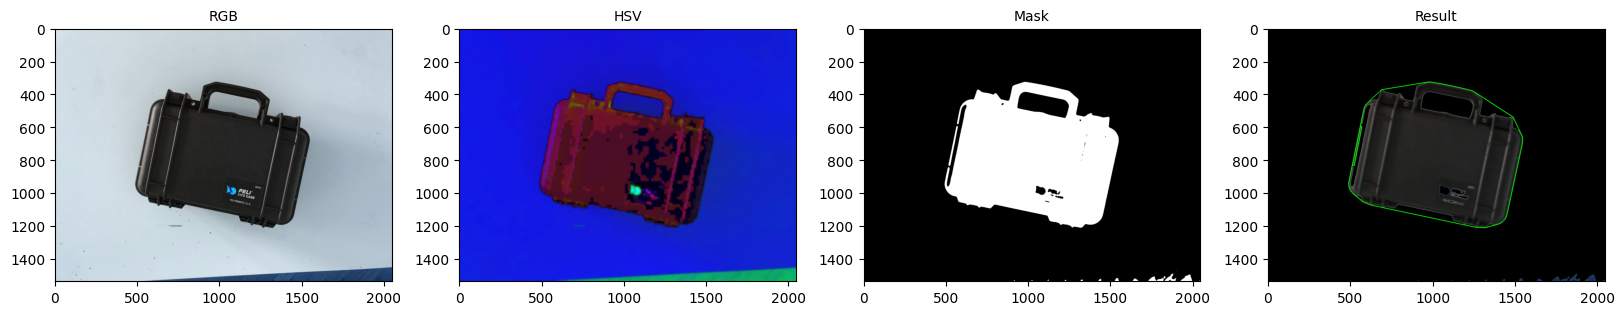

In [13]:
# calculate area
cont_area = []
for i in range(len(contours)):
    area = cv2.contourArea(hull_list[i])
    cont_area.append(area)

cont_area = np.array(cont_area)
two_biggest_conts = np.argsort(cont_area, axis=0)[-2:]

largest_contour_index = np.argmax(cont_area)

print(two_biggest_conts)

result_cp = result.copy()

for i in two_biggest_conts:
    cv2.drawContours(result_cp, hull_list, i, (0, 255, 0), 3)

show_img_hsv_mask_result(img, img_hsv, mask, result_cp)

In [14]:
for i in range(len(hierarchy[0])):
    print(i, hierarchy[0][i])

0 [ 1 -1 -1 -1]
1 [ 2  0 -1 -1]
2 [ 3  1 -1 -1]
3 [ 4  2 -1 -1]
4 [ 5  3 -1 -1]
5 [ 6  4 -1 -1]
6 [ 7  5 -1 -1]
7 [ 8  6 -1 -1]
8 [ 9  7 -1 -1]
9 [10  8 -1 -1]
10 [11  9 -1 -1]
11 [12 10 -1 -1]
12 [13 11 -1 -1]
13 [14 12 -1 -1]
14 [15 13 -1 -1]
15 [16 14 -1 -1]
16 [-1 15 -1 -1]


In [15]:
print(hierarchy[0])

[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [ 5  3 -1 -1]
 [ 6  4 -1 -1]
 [ 7  5 -1 -1]
 [ 8  6 -1 -1]
 [ 9  7 -1 -1]
 [10  8 -1 -1]
 [11  9 -1 -1]
 [12 10 -1 -1]
 [13 11 -1 -1]
 [14 12 -1 -1]
 [15 13 -1 -1]
 [16 14 -1 -1]
 [-1 15 -1 -1]]


In [16]:
for h in range(len(hierarchy[0])):
    if hierarchy[0][h][3] == largest_contour_index:
        print(hierarchy[0][h])
        area = cv2.contourArea(hull_list[h])
        

### Dilation and erosion

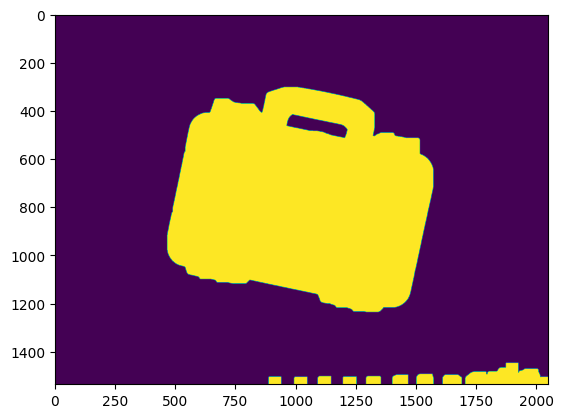

In [22]:
mask_cp = mask.copy()
kernel = np.ones((25,25), np.uint8)
img_dilate = cv2.dilate(mask_cp, kernel, iterations=2)
plt.imshow(img_dilate)
plt.show()

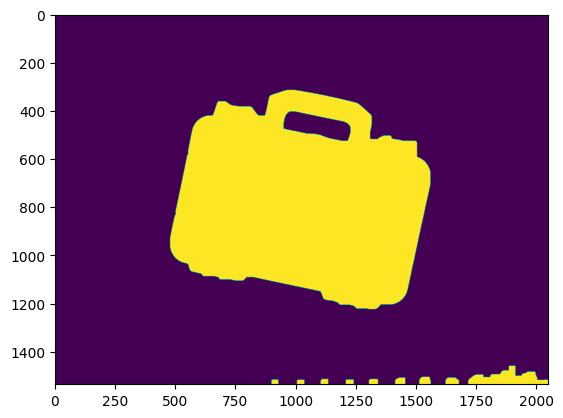

In [26]:
img_erosion = cv2.erode(img_dilate, kernel, iterations=1)
plt.imshow(img_erosion)
plt.show()